In [1]:
#### IMPORTING THE NECESSARY LIBRARYS ####

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import pickle
from sklearn.model_selection import train_test_split

In [2]:
#### GOING TO THE IMAGE DIRECTORY AND CONVERTING THE IMAGES TO THE REQUIRED SHAPE ####

training_data = []

# spacify the path to the directory that contains images 
DATADIR = r"C:\Users\bvraju\Desktop\project_1\image_model\Sign-Language-Digits-Dataset\Dataset"
CATEGORIES = ["0","1","2","3","4","5","6","7","8","9"]


def create_training_data():  #this function converts the images to array and creates the labels for them
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(100,100))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

            
create_training_data()     # calling the function



In [3]:
# printing the total number of examples and shape

print("image shape : ",training_data[0][0].shape,"total examples (train + validation + test) = ",len(training_data))

image shape :  (100, 100) total examples (train + validation + test) =  2062


In [4]:
# converting the labels into one hot vector


X_data=[]
y_data=[]
for x,y in training_data:
    X_label = x
    y_label = y
    X_data.append(X_label)
    y_data.append(y_label)
    
num_class = 10
y_oneHOT = np.eye(num_class)[y_data] 
y_oneHOT.shape

In [6]:
# saving the labels and image array into files  
    
pickle_out = open('X_Data.pickle','wb')
pickle.dump(X_data, pickle_out)
pickle_out.close()

pickle_out = open('y_Data.pickle', 'wb')
pickle.dump(y_oneHOT, pickle_out)
pickle_out.close()

In [ ]:
# loading the data from the saved file (this step can be skipped)

X_Temp = open('X_Data.pickle','rb')
y_Temp = open('y_Data.pickle','rb')
 
X = pickle.load(X_Temp)
y = pickle.load(y_Temp)

X_Temp.close()
y_Temp.close()

In [1]:

from sklearn.utils import shuffle  # shuffling the data
X,y = shuffle(X,y, random_state=2)

X = np.array(X).reshape(-1, 100,100, 1)  # converting the data into arrays
X = np.array(X/255.0)
y = np.array(y).reshape(-1,10)

# spliting the data into training ,validation, testing sets (training set contains both training and validation set)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)
print("number of total examples (training + valdation + testing) = ",len(X),len(y))
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

number of total examples (training + valdation + testing) =  2062 2062
(1752, 100, 100, 1) (1752, 10) (310, 100, 100, 1) (310, 10)


In [2]:
#### IMPPORTING THE LIBRARIES REQUIRED FOR THE MODEL  ####

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [3]:
model = Sequential()  # creating the model 

model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))   #
model.add(Activation("relu"))                           # conv layer 1
model.add(MaxPooling2D(pool_size=(2,2)))                #

model.add(Conv2D(64,(3,3)))                             #
model.add(Activation("relu"))                           # conv layer 2
model.add(MaxPooling2D(pool_size=(2,2)))                #


model.add(Flatten())                                    #
model.add(Dense(64))                                    # fully connected layer

model.add(Dense(10))                                    #
model.add(Activation('softmax'))                        # output layer 

model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])      # compiling the model

In [4]:
model.summary()     # summary of the model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [5]:
#### TRAINING THE MODEL ####
num_epochs = 18 
hist=model.fit(X_train,y_train,batch_size=32,epochs=num_epochs,validation_split=0.10) 

Train on 1576 samples, validate on 176 samples
Epoch 1/18
1576/1576 [==============================] - 26s 16ms/sample - loss: 2.4188 - accuracy: 0.1447 - val_loss: 2.1545 - val_accuracy: 0.2955
Epoch 2/18
1576/1576 [==============================] - 25s 16ms/sample - loss: 1.5086 - accuracy: 0.5438 - val_loss: 1.0028 - val_accuracy: 0.7273
Epoch 3/18
1576/1576 [==============================] - 25s 16ms/sample - loss: 0.7736 - accuracy: 0.7392 - val_loss: 0.7309 - val_accuracy: 0.7557
Epoch 4/18
1576/1576 [==============================] - 25s 16ms/sample - loss: 0.5640 - accuracy: 0.8198 - val_loss: 0.6512 - val_accuracy: 0.7898
Epoch 5/18
1576/1576 [==============================] - 25s 16ms/sample - loss: 0.4643 - accuracy: 0.8566 - val_loss: 0.5940 - val_accuracy: 0.8125
Epoch 6/18
1576/1576 [==============================] - 25s 16ms/sample - loss: 0.3861 - accuracy: 0.8801 - val_loss: 0.5669 - val_accuracy: 0.8352
Epoch 7/18
1576/1576 [==============================] - 25s 16ms/

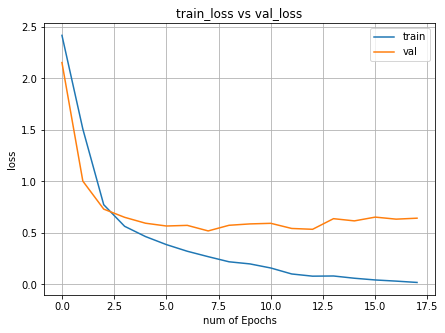

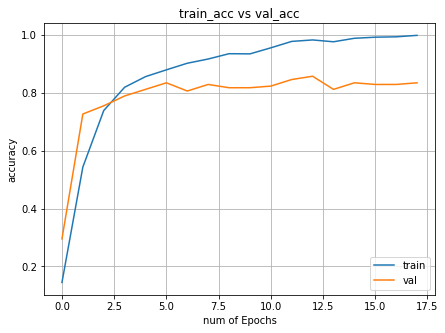

In [7]:

# visualizing losses and accuracy

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(num_epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
#plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
#plt.style.use(['classic'])

plt.show()

In [8]:
#### SAVING THE TRAINED WEIGHTS (helps not to train the model multiple number of times) ####

sure = int(input("press 1 to continue..."))
if sure == 1:
    fname = "trained_weights"
    model.save_weights(fname , overwrite=True)
    print("saved the new weights")
else:
    print("no new weights are saved")    

press 1 to continue...1
saved the new weights


In [9]:
# loading the weights (this step can be skipped)

fname = "trained_weights"
model.load_weights(fname)

In [41]:
#### TESTING THE TRAINED MODEL WITH TEST SET #### 

predected=model.predict_classes([X_test]) 
predected = predected.reshape(-1,1)
print(len(predected),predected.shape)

310 (310, 1)


In [42]:
#  these are the labels to the testing set (converting the labels from one hot to corresponding classes )
y_test_one=[]
for onehot in y_test:
    i=0
    for j in onehot:
        if j==1:
            y_test_one.append(i)
        i+=1
y_test = np.array(y_test_one).reshape(-1,1)     

In [43]:
#### CALCULATING THE ACCURACY ON THE TEST SET ####

count=0
for i in range(310):
    if predected[i]==y_test_one[i]:
        count+=1
print("accuracy on test : ",count/len(X_test))  

accuracy on test :  0.8258064516129032
